### <font color="green">RNN and SVM Model for Stock prediction using stock data with window size 50</font>

**Import Libraries**

In [48]:
#Import Libraries
import math
import time
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import sklearn.preprocessing as prep
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import GRU
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import svm
plt.style.use('fivethirtyeight')

In [49]:
#Fetch data from Yahoo finance 
df = web.DataReader('AMD', data_source='yahoo', start='2012-01-01', end='2019-12-31') 

#To get the stock data for companies Tesla, AMD and Dis uncomment the respective lines below
#df = web.DataReader('TSLA', data_source='yahoo', start='2012-01-01', end='2019-12-31') 
#df = web.DataReader('AMD', data_source='yahoo', start='2012-01-01', end='2019-12-31') 
#df = web.DataReader('DIS', data_source='yahoo', start='2012-01-01', end='2019-12-31') 
#Show the data 
df.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.59,5.44,5.53,5.48,12675100,5.48
2012-01-04,5.49,5.41,5.47,5.46,8034900,5.46
2012-01-05,5.57,5.35,5.45,5.46,11476900,5.46
2012-01-06,5.52,5.39,5.44,5.43,12938600,5.43
2012-01-09,5.60,5.38,5.42,5.59,12585400,5.59


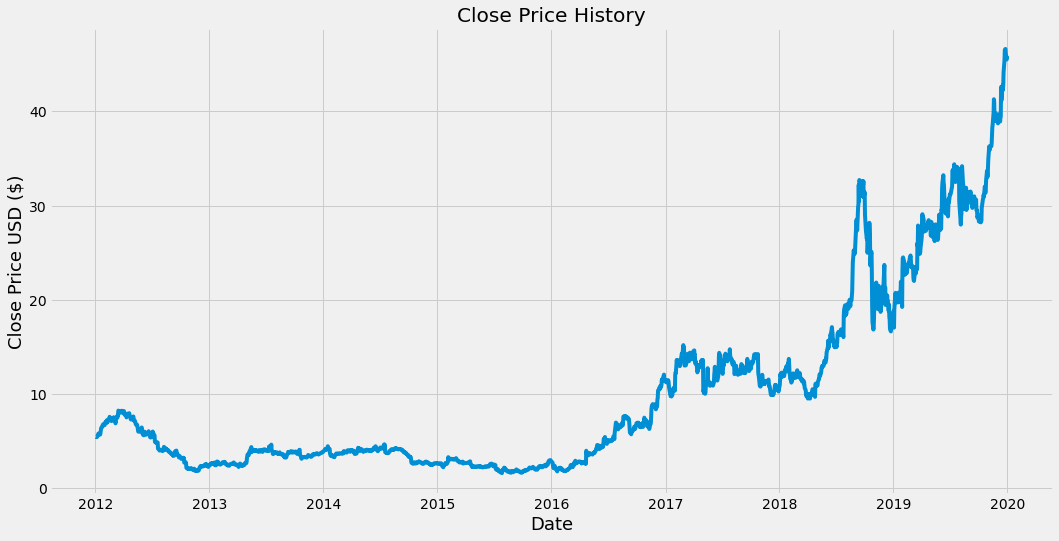

In [50]:
#Visualizing the close price 
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

**Data Preprocessing**

In [51]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)

In [52]:
#Data sclaing using minmax scaler
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

**Trainig Data and Test Data with Window Size 50**

In [53]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
#Append the each training data with previous 60 Values
#These experements can repeated for multiple window size,
#for i in range(50,len(train_data)):
#for i in range(70,len(train_data)):
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

In [54]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)

(1550, 60)


In [55]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#test_data = scaled_data[training_data_len: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [56]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [57]:
print("X_train", x_train.shape)
print("y_train", y_train.shape)
print("X_test", x_test.shape)
print("y_test", y_test.shape)

X_train (1550, 60)
y_train (1550,)
X_test (402, 60)
y_test (402, 1)


**SVM**

In [58]:
#Model creation
clf = svm.SVR()
#Model trainig
clf.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [60]:
#Test trained model
preds = clf.predict(x_test)
preds = preds.reshape(-1,1)
preds = scaler.inverse_transform(preds)#Undo scaling
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rms

19.456968754262775

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


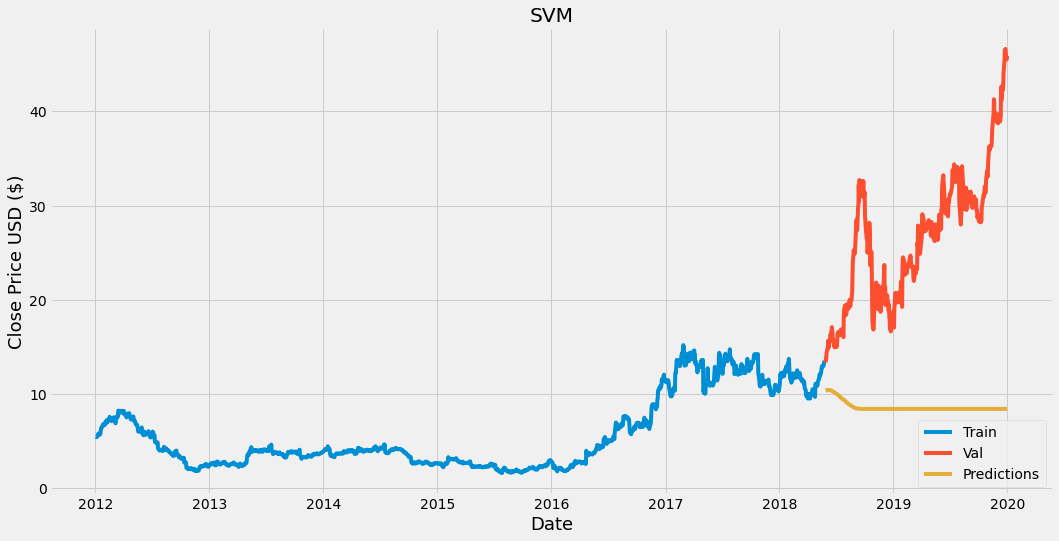

In [61]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = preds
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('SVM')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()